##  Problem Description: Stock Price Forecasting for AAPL

###  Objective:
The goal of this project is to develop a time series forecasting model to predict future **closing prices** of Apple Inc. (AAPL) stock based on historical daily trading data. Accurate forecasts can assist investors, analysts, and automated trading systems in making informed decisions.

###  Dataset Overview:
The dataset contains daily stock market data for AAPL, including:
- `date`: Trading date
- `open`: Opening price
- `high`: Highest price of the day
- `low`: Lowest price of the day
- `close`: Closing price (target variable)
- `volume`: Number of shares traded
- `Name`: Stock ticker (AAPL)

###  Problem Statement:
Given historical stock data from February 2013 onward, build a time series model that can forecast the **closing price** of AAPL for future dates. The model should capture temporal patterns, trends, and seasonality in the data to produce reliable short-term forecasts.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


###  Tasks:
1. **Data Preprocessing**:
   - Convert `date` to datetime format and set it as index.
   - Handle missing values and outliers if any.
   - Optionally engineer features like rolling averages, lag values, or volatility indicators.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize trends, seasonality, and volatility.
   - Analyze correlations between features.

3. **Modeling Approaches**:
   - Baseline models: Naive, Moving Average
   - Classical models: ARIMA, SARIMA, Holt-Winters
   - Advanced models: LSTM, Prophet, or hybrid ML pipelines

4. **Evaluation**:
   - Use metrics like RMSE, MAE, and MAPE to assess forecast accuracy.
   - Compare performance across models and time horizons.

5. **Deployment (Optional)**:
   - Build an interactive dashboard or API to serve forecasts.

###  Assumptions:
- The market is influenced by historical price movements and volume.
- External factors (news, earnings, macroeconomics) are not included in this dataset.


In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df.shape

(1259, 7)

In [5]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [7]:
df.duplicated()[0].sum()

np.int64(0)

In [8]:
df.duplicated()[1].sum()

np.int64(0)

In [9]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [10]:
df.describe(include='all')

,date,open,high,low,close,volume,Name
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259
unique,1259,NaN,NaN,NaN,NaN,NaN,1
top,2018-02-07,NaN,NaN,NaN,NaN,NaN,AAPL
freq,1,NaN,NaN,NaN,NaN,NaN,1259
mean,NaN,109.055429,109.951118,108.141589,109.066698,5.404790e+07,NaN
std,NaN,30.549220,30.686186,30.376224,30.556812,3.346835e+07,NaN
min,NaN,55.424200,57.085700,55.014200,55.789900,1.147592e+07,NaN
25%,NaN,84.647800,85.334950,84.250650,84.830650,2.969438e+07,NaN
50%,NaN,108.970000,110.030000,108.050000,109.010000,4.566893e+07,NaN
75%,NaN,127.335000,128.100000,126.290000,127.120000,6.870872e+07,NaN


In [11]:
df_orginal=df.copy()

In [12]:
## lets check whether the year month and day are effecting the stock price

In [13]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [14]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day of week']=df['date'].dt.dayofweek

In [15]:
# lets check wherether the day of the week or the stock market s open on weekends

df['day of week'].value_counts()

,count
day of week,
1,260
2,259
4,252
3,252
0,236


In [16]:
#checking for interval consistency

df = df.sort_values('date')

# Get the time differences
diffs = df['date'].diff().dropna()

print(diffs.value_counts().head(10))
print("Unique intervals:", diffs.unique())


date
1 days    986
3 days    227
4 days     34
2 days     11
Name: count, dtype: int64
Unique intervals: <TimedeltaArray>
['3 days', '1 days', '4 days', '2 days']
Length: 4, dtype: timedelta64[ns]


In [17]:
# Example: expected daily frequency
all_days = pd.date_range(df['date'].min(), df['date'].max(), freq='D')
missing_days = all_days.difference(df['date'])

print("Missing days:", len(missing_days))


Missing days: 567


In [18]:
''' Keep trading days only (Recommended for stock forecasting)

Stock prices only exist on trading days.

You don’t need to “fill weekends/holidays” with data.

ARIMA and ML models can handle this fine.

Best Practice for Stock Forecasting

Do not resample to calendar days unless your model requires evenly spaced time series.

ARIMA, LSTMs, Prophet → all can handle trading days only (no resampling). '''

' Keep trading days only (Recommended for stock forecasting)\n\nStock prices only exist on trading days.\n\nYou don’t need to “fill weekends/holidays” with data.\n\nARIMA and ML models can handle this fine.\n\nBest Practice for Stock Forecasting\n\nDo not resample to calendar days unless your model requires evenly spaced time series.\n\nARIMA, LSTMs, Prophet → all can handle trading days only (no resampling). '

In [19]:
# from above results we can see the stock market is not opened on sunday

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df.set_index('date', inplace=True)
df.sort_index(inplace=True)  # Ensure chronological order


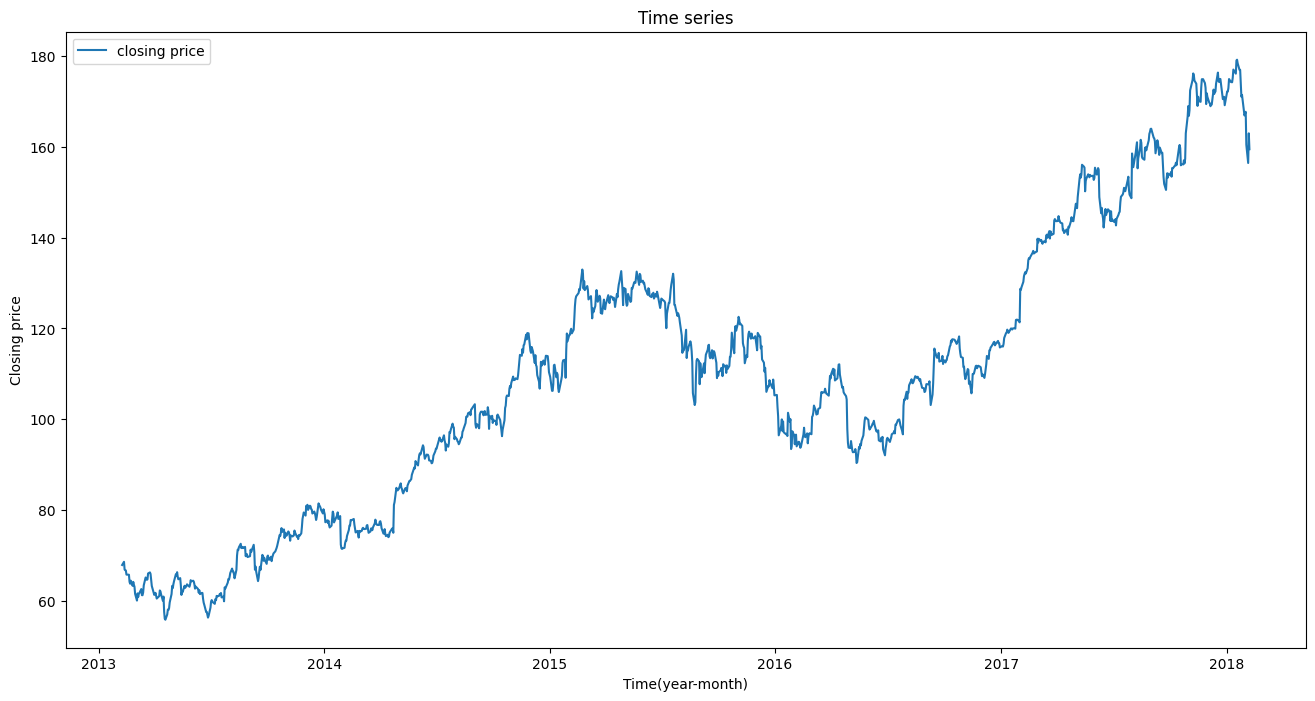

In [21]:
plt.figure(figsize=(16,8))
plt.plot(df.close,label='closing price')
plt.title('Time series')
plt.xlabel('Time(year-month)')
plt.ylabel('Closing price')
plt.legend(loc='best')


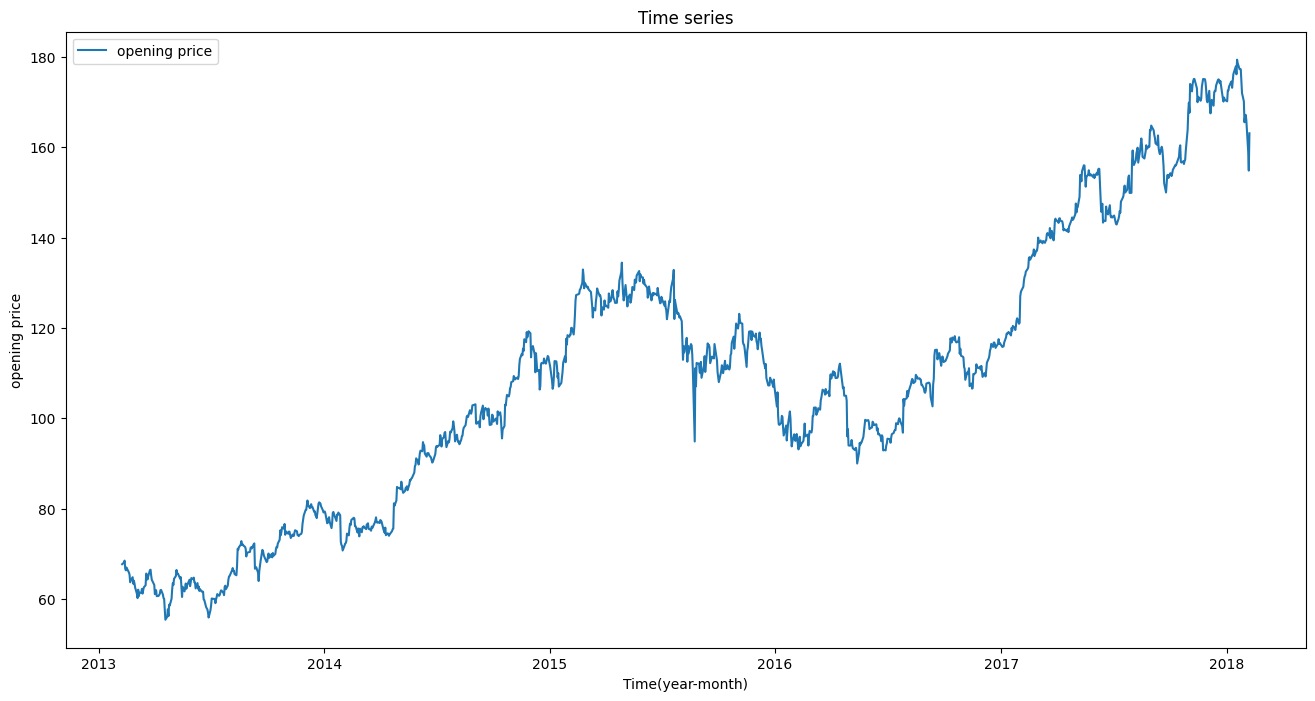

In [22]:
plt.figure(figsize=(16,8))
plt.plot(df.open,label='opening price')
plt.title('Time series')
plt.xlabel('Time(year-month)')
plt.ylabel('opening price')
plt.legend(loc='best')


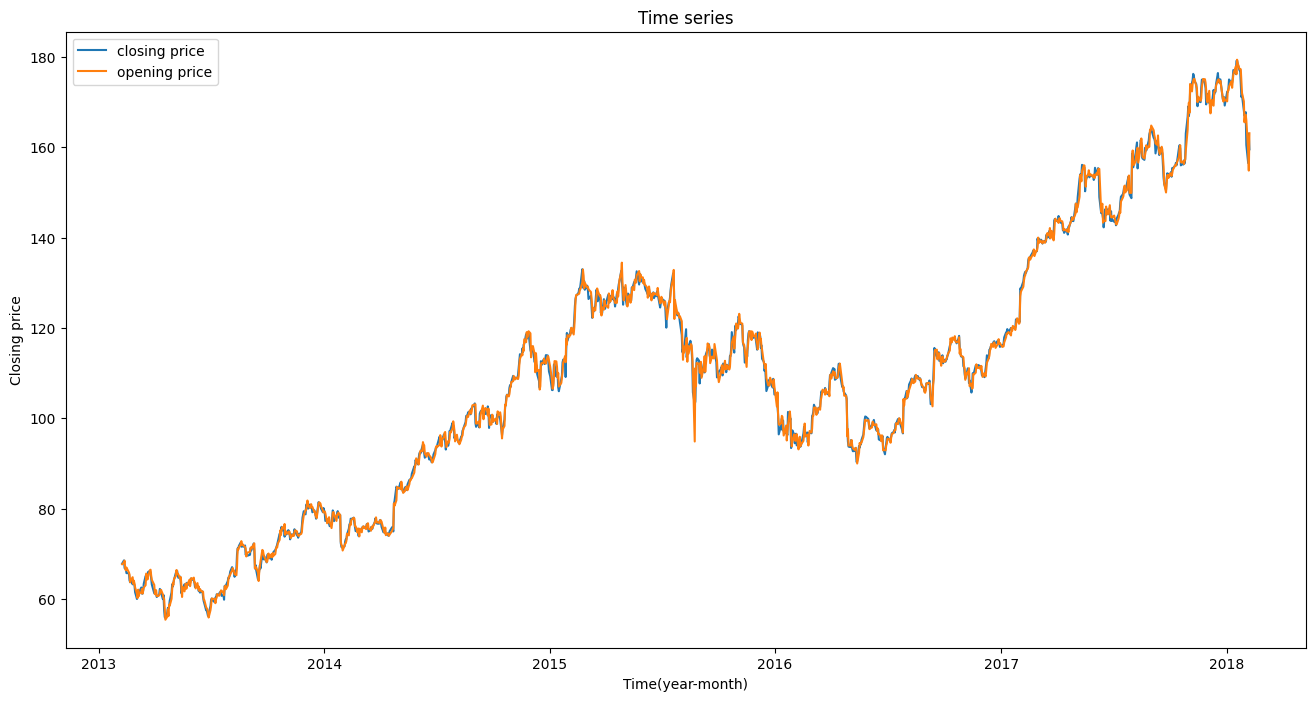

In [23]:
plt.figure(figsize=(16,8))
plt.plot(df.close,label='closing price')
plt.plot(df.open,label='opening price')
plt.title('Time series')
plt.xlabel('Time(year-month)')
plt.ylabel('Closing price')
plt.legend(loc='best')


From the above graph, we can observe:

- **Long-term trend:** There is a clear overall upward trend in the closing price of AAPL stock from 2013 to 2018.
- **Sudden spikes or drops:** There are periods of sharp increases and decreases in price, which could be attributed to various factors like earnings reports, product announcements, or macroeconomic events.
- **Periods of high volatility:** Some periods show wider fluctuations between the high and low prices, indicating higher market volatility. The volatility band in the 30-day moving average plot helps visualize these periods.

In [24]:
''' From the above graph, we can observe:

Long-term trend: There is a clear overall upward trend in the closing price of
 AAPL stock from 2013 to 2018.

Sudden spikes or drops: There are periods of sharp increases and decreases in
price, which could be attributed to various factors like earnings reports, product
announcements, or macroeconomic events.

Periods of high volatility: Some periods show wider fluctuations between the
high and low prices, indicating higher market volatility. The volatility band
 in the 30-day moving average plot helps visualize these periods '''

' From the above graph, we can observe:\n\nLong-term trend: There is a clear overall upward trend in the closing price of\n AAPL stock from 2013 to 2018.\n\nSudden spikes or drops: There are periods of sharp increases and decreases in\nprice, which could be attributed to various factors like earnings reports, product\nannouncements, or macroeconomic events.\n\nPeriods of high volatility: Some periods show wider fluctuations between the\nhigh and low prices, indicating higher market volatility. The volatility band\n in the 30-day moving average plot helps visualize these periods '

In [25]:
# checking for the seasonality and cyclicity

/tmp/ipython-input-3013074891.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['close'].resample('M').mean()


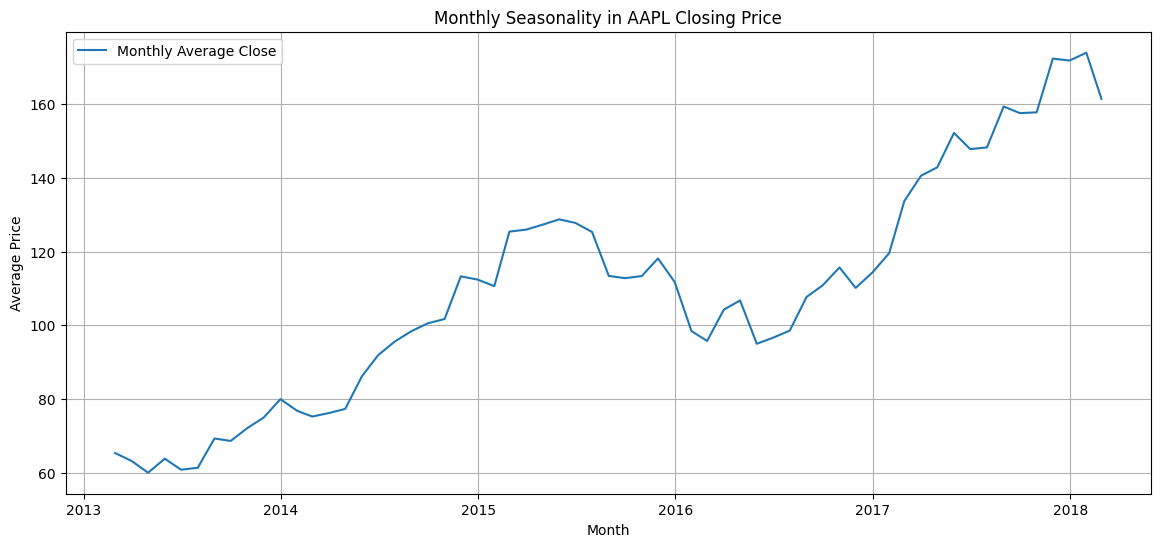

In [26]:
monthly_avg = df['close'].resample('M').mean()
plt.figure(figsize=(14,6))
plt.plot(monthly_avg, label='Monthly Average Close')
plt.title('Monthly Seasonality in AAPL Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
'''
Based on the graph, there doesn't appear to be a strong, obvious monthly or
 quarterly seasonal pattern in the average closing price. While there are
 fluctuations, they don't repeat consistently at the same times each year in
 a clear cyclical manner. This suggests that other factors might be more
  dominant than simple calendar-based seasonality in driving AAPL's price
  movements during this period.'''

"\nBased on the graph, there doesn't appear to be a strong, obvious monthly or\n quarterly seasonal pattern in the average closing price. While there are\n fluctuations, they don't repeat consistently at the same times each year in\n a clear cyclical manner. This suggests that other factors might be more\n  dominant than simple calendar-based seasonality in driving AAPL's price\n  movements during this period."

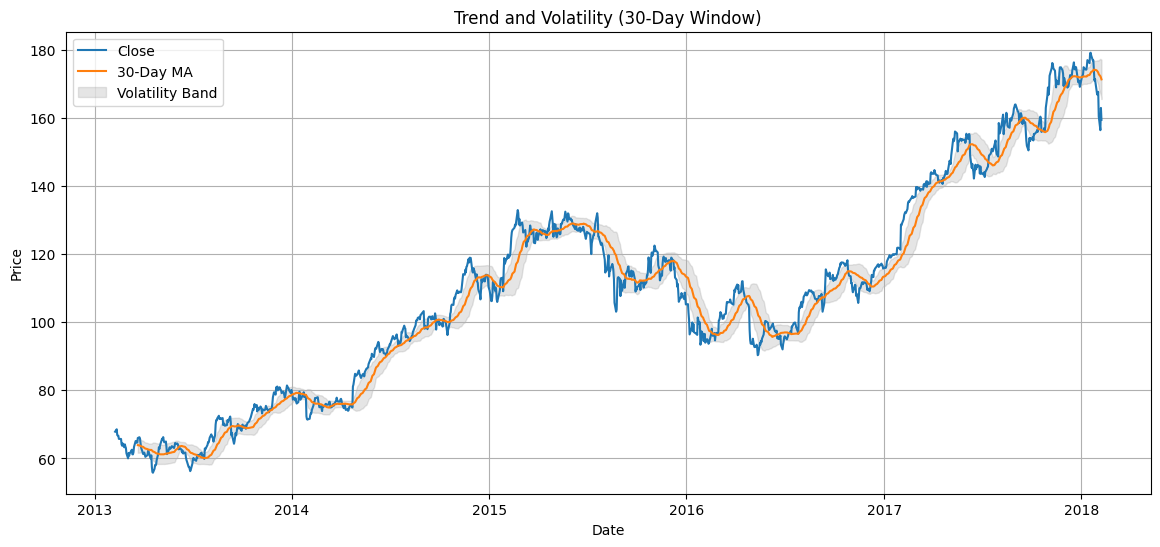

In [28]:
df['MA_30'] = df['close'].rolling(window=30).mean()
df['STD_30'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close')
plt.plot(df['MA_30'], label='30-Day MA')
plt.fill_between(df.index, df['MA_30'] - df['STD_30'], df['MA_30'] + df['STD_30'], color='gray', alpha=0.2, label='Volatility Band')
plt.title('Trend and Volatility (30-Day Window)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

From the above graph, we can observe:

- **Smoother trend lines:** The 30-day moving average line provides a smoothed representation of the closing price trend, filtering out short-term fluctuations.
- **Volatility zones (wider bands = higher uncertainty):** The shaded gray area represents the volatility band (based on the standard deviation). Wider bands indicate periods of higher price volatility and thus higher uncertainty in the market.

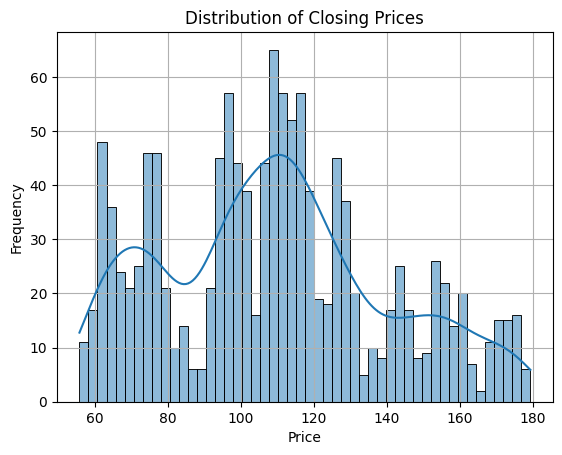

In [29]:
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Based on the distribution of closing prices shown in the histogram:

- **Normal vs skewed distribution:** Observe the shape of the histogram. Does it resemble a bell curve (normal distribution), or is it skewed to one side? A skewed distribution might indicate periods of rapid price increases or decreases.
- **Price clusters or outliers:** Look for any noticeable clusters of prices or individual data points that are far away from the main body of the distribution. Outliers could represent unusual trading days or events.

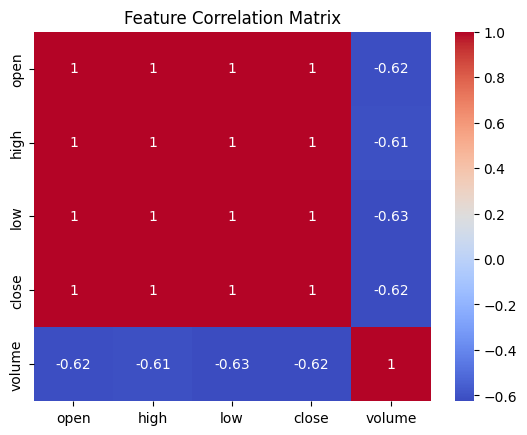

In [30]:
# finding the correlation between variables

corr_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [31]:
'''
we can see there is a strong correlation between open, hight, low and close when compatred to volume
'''

'\nwe can see there is a strong correlation between open, hight, low and close when compatred to volume\n'

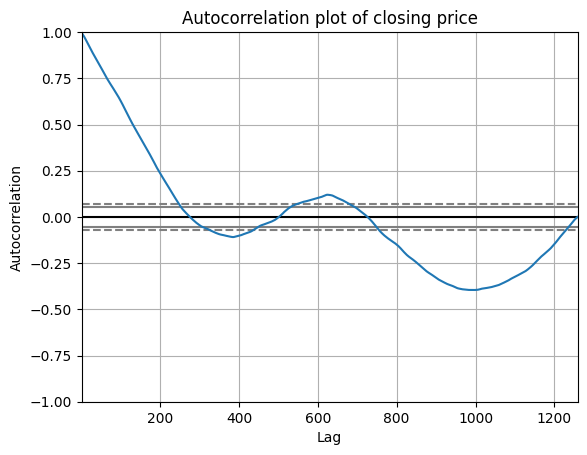

In [32]:
# lag analysis

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['close'])
plt.title('Autocorrelation plot of closing price')
plt.show()

Based on the autocorrelation plot of the closing price:

 We can see a strong autocorrelation at lag 1, which is expected for time series data. We can also observe significant autocorrelation decaying over many lags.

- **Seasonality hints:** While the plot shows decaying autocorrelation, there doesn't appear to be strong, repeating patterns at specific lags that would clearly indicate seasonality (like spikes at lags 7, 30, 365, etc.). This aligns with our earlier observation from the monthly average plot.

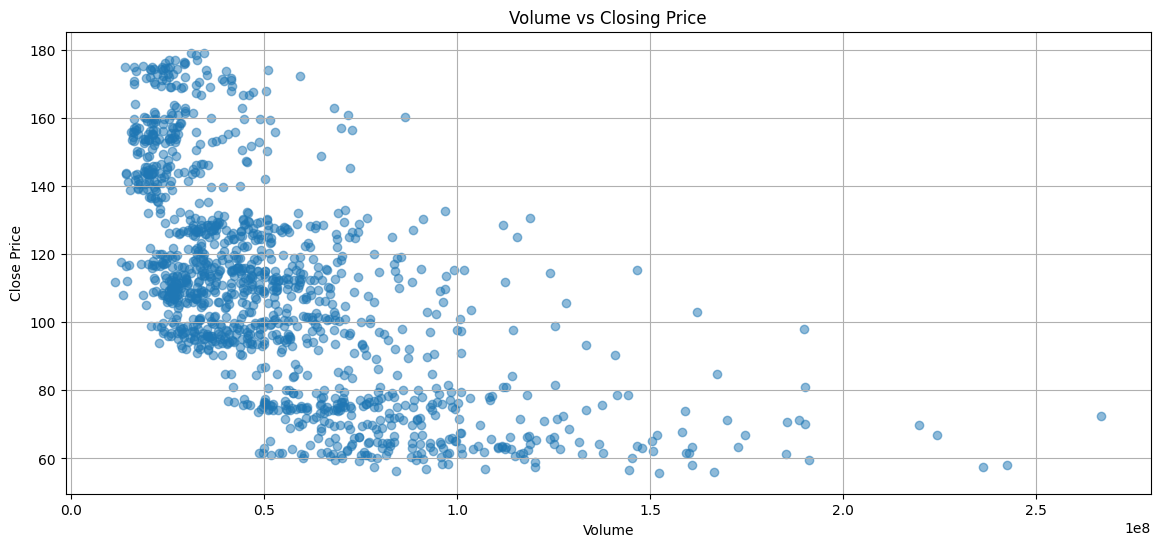

In [33]:
plt.figure(figsize=(14,6))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## model building

from the eda we have seen that
there is a strong trend ,
no clear seasonality
high volatility in certain periods
strong autocollertaions

In [34]:
df.shape

(1259, 12)

In [35]:
1259*0.20

251.8

In [36]:
train, valid = df[0:-251], df[-251:]

In [37]:
train.index.min(),train.index.max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2017-02-08 00:00:00'))

In [38]:
valid.index.min(),valid.index.max()

(Timestamp('2017-02-09 00:00:00'), Timestamp('2018-02-07 00:00:00'))

In [39]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=2)
for train_index, val_index in tscv.split(df):
    train1, valid1 = df.iloc[train_index], df.iloc[val_index]
    print(len(train), len(valid))


1008 251
1008 251


In [40]:
# creating a neavie model which take last observation as the  next observation

valid['navie_pred'] = df['close'].iloc[-1]

/tmp/ipython-input-4059175888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['navie_pred'] = df['close'].iloc[-1]


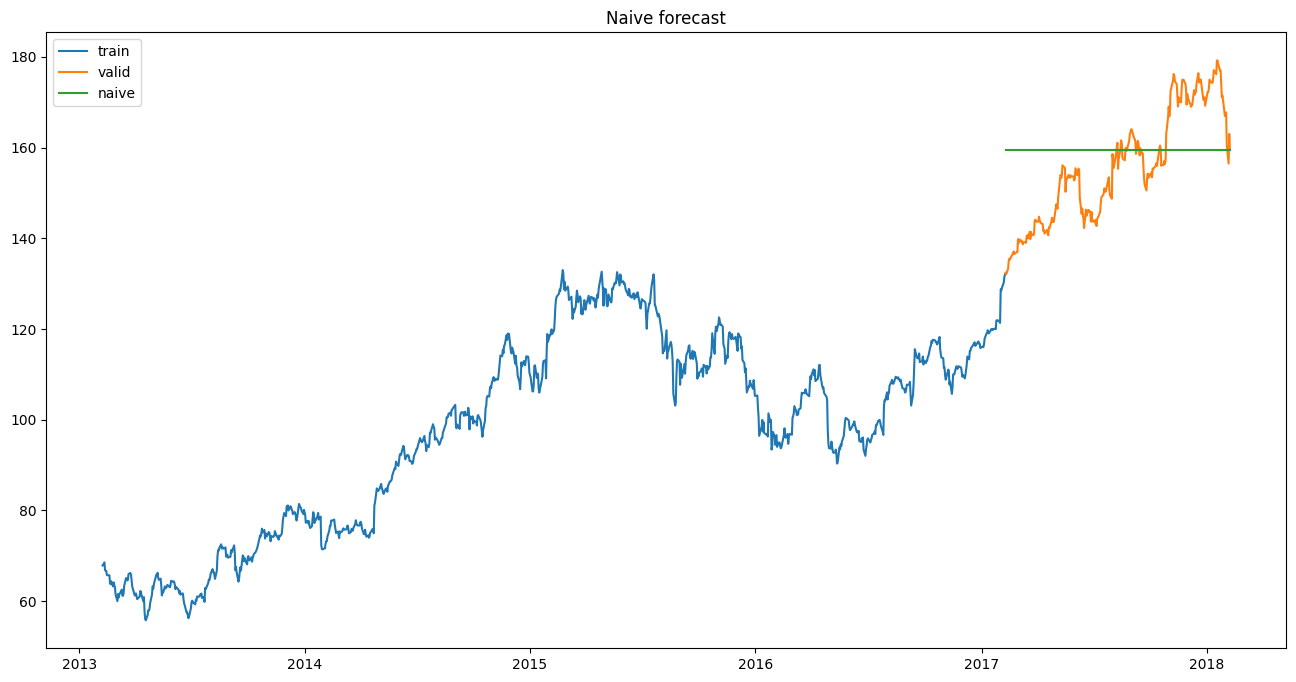

In [41]:
plt.figure(figsize=(16,8))

plt.plot(train.index, train['close'], label='train')
plt.plot(valid.index, valid['close'], label='valid')
plt.plot(valid.index, valid['navie_pred'], label='naive')
plt.legend(loc='best')
plt.title('Naive forecast')
plt.show()

In [42]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

print('root mean square error',root_mean_squared_error(valid['close'],valid['navie_pred']))
print('mean absolute error',mean_absolute_error(valid['close'],valid['navie_pred']))

root mean square error 12.801503183803854
mean absolute error 10.912888446215137


# Moving average model

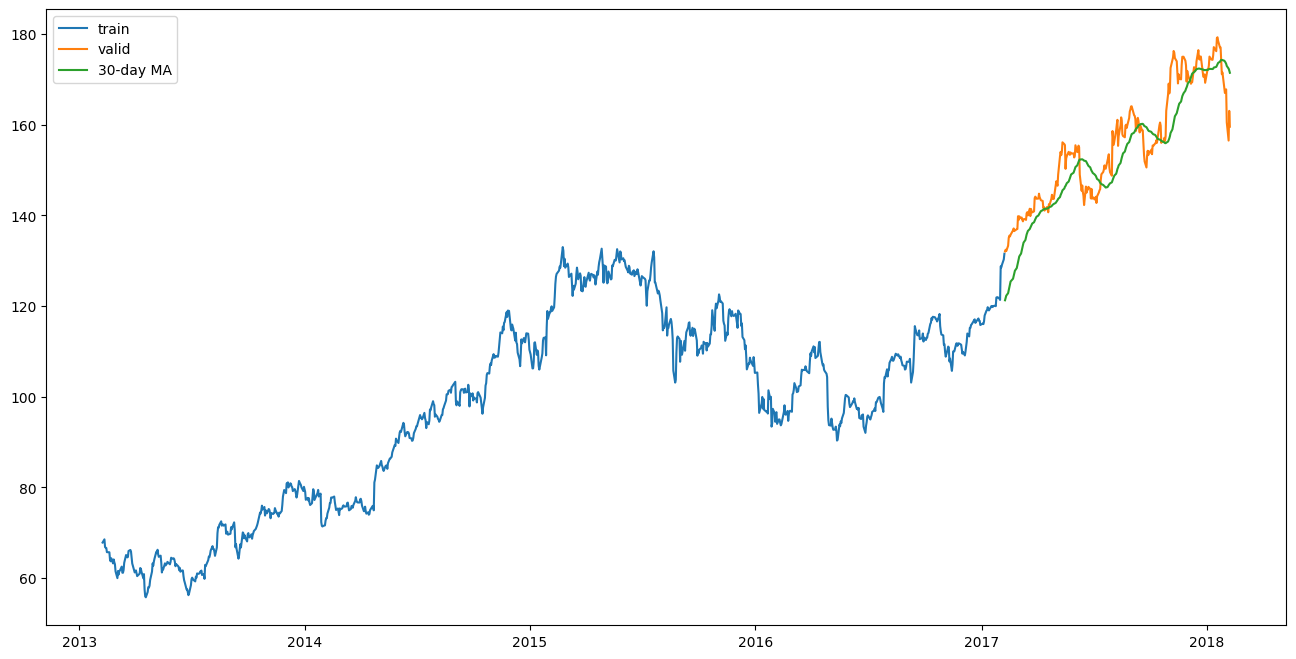

In [43]:
# Compute moving average on full data BEFORE splitting
df['ma_period'] = df['close'].rolling(window=30, min_periods=1).mean()

# Split into train and validation
train_size = int(len(df) * 0.8)
train, valid = df.iloc[:train_size], df.iloc[train_size:]

# Plot
plt.figure(figsize=(16,8))
plt.plot(train.index, train['close'], label='train')
plt.plot(valid.index, valid['close'], label='valid')
plt.plot(valid.index, valid['ma_period'], label='30-day MA')
plt.legend(loc='best')
plt.show()


In [44]:

print('root mean square error',root_mean_squared_error(valid['close'],valid['ma_period']))
print('mean absolute error',mean_absolute_error(valid['close'],valid['ma_period']))

root mean square error 6.103731007531508
mean absolute error 5.000027777777778


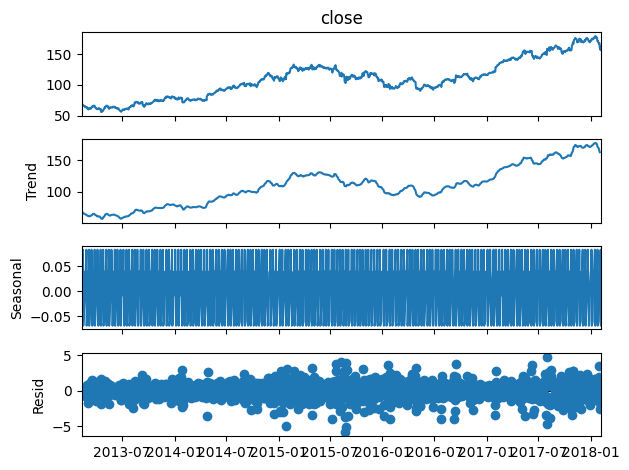

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

sm.tsa.seasonal_decompose(df['close'], period=7).plot()
result=adfuller(train.close)
plt.show()

# Classicical Time series model like arima

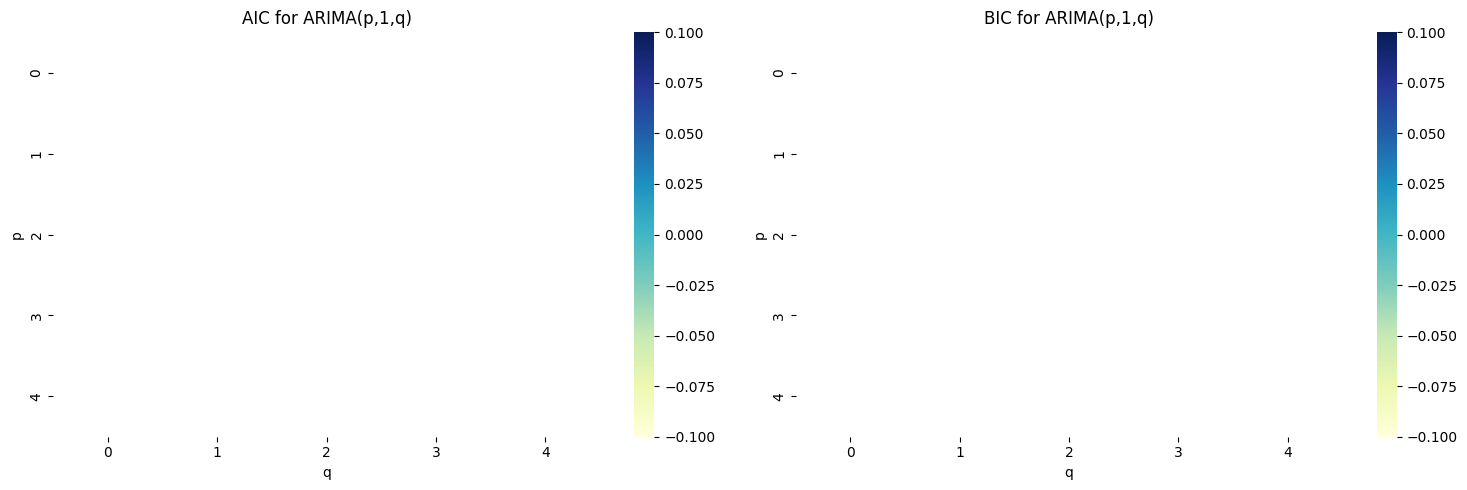

In [46]:

import warnings
warnings.filterwarnings('ignore')

# Define the range of p and q values to test
p_values = range(0, 5)
q_values = range(0, 5)


aic_values = []
bic_values = []

for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(train['close'], order=(p, 1, q)) # Assuming d=1 based on previous analysis
            model_fit = model.fit()
            aic_values.append(model_fit.aic)
            bic_values.append(model_fit.bic)
        except:
            aic_values.append(np.nan)
            bic_values.append(np.nan)

aic_matrix = np.array(aic_values).reshape((len(p_values), len(q_values)))
bic_matrix = np.array(bic_values).reshape((len(p_values), len(q_values)))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(aic_matrix, ax=axes[0], annot=True, fmt=".0f", cmap="YlGnBu", xticklabels=q_values, yticklabels=p_values)
axes[0].set_title("AIC for ARIMA(p,1,q)")
axes[0].set_xlabel("q")
axes[0].set_ylabel("p")

sns.heatmap(bic_matrix, ax=axes[1], annot=True, fmt=".0f", cmap="YlGnBu", xticklabels=q_values, yticklabels=p_values)
axes[1].set_title("BIC for ARIMA(p,1,q)")
axes[1].set_xlabel("q")
axes[1].set_ylabel("p")

plt.tight_layout()
plt.show()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
model = ARIMA(train['close'], order=(1,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(valid))

# Align with validation index
valid['arima_pred'] = pd.Series(forecast.values, index=valid.index)


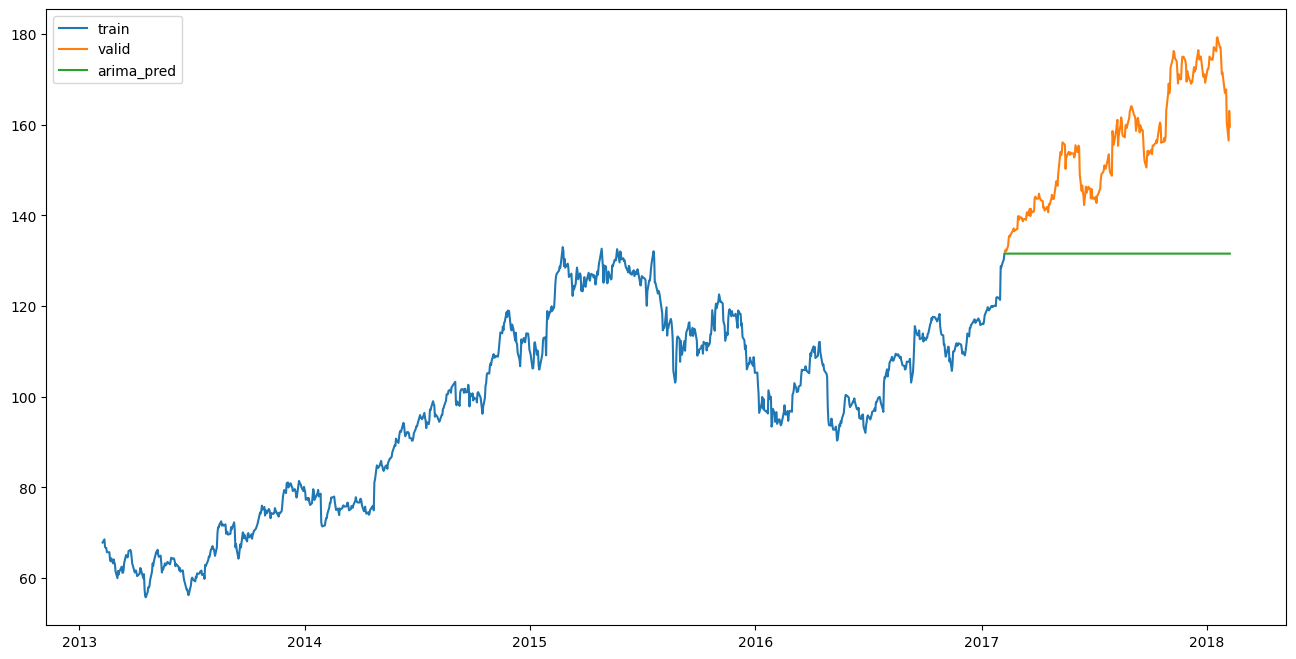

In [48]:
plt.figure(figsize=(16,8))
plt.plot(train.close,label='train')
plt.plot(valid.close,label='valid')
plt.plot(valid.arima_pred,label='arima_pred')
plt.legend(loc='best')
plt.show()

In [49]:

print("root mean squared error=",root_mean_squared_error(valid.close,valid.arima_pred))

root mean squared error= 27.023439952634348


## apply the holt winter to capture trend and seasonality

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(train['close'],trend='add',seasonal=None)

model_fit=model.fit()

forecast=model_fit.forecast(len(valid))
valid['holt_period']=pd.Series(forecast.values,index=valid.index)

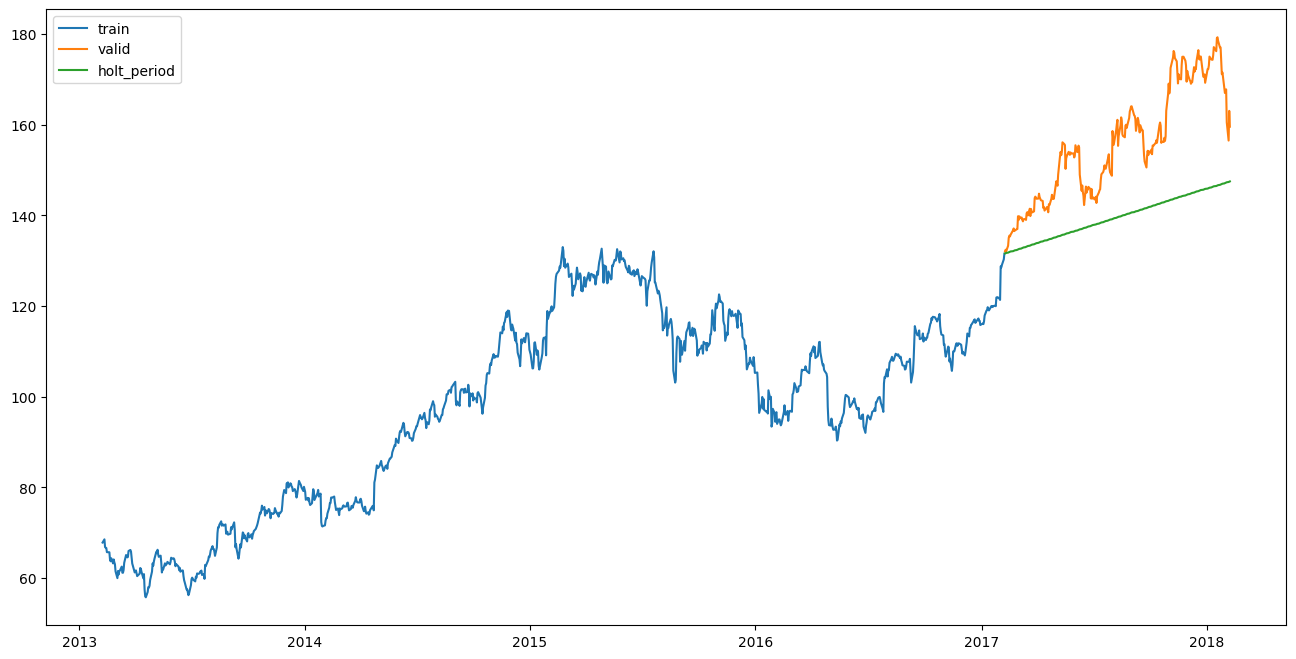

In [51]:
plt.figure(figsize=(16,8))
plt.plot(train.close,label='train')
plt.plot(valid.close,label='valid')
plt.plot(valid.holt_period,label='holt_period')
plt.legend(loc='best')
plt.show()

In [52]:
print('root mean squared error',root_mean_squared_error(valid.close,valid['holt_period']))

root mean squared error 18.10711860296036


In [53]:
# arima and holt winter are univarient analysis techniques so try with sarima

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_sarimax = train.dropna(subset=['volume', 'MA_30'])
valid_sarimax = valid.dropna(subset=['volume', 'MA_30'])

# Fit SARIMAX
model = SARIMAX(train_sarimax['close'],
                order=(5,1,1),
                exog=train_sarimax[['volume','MA_30']])
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(valid_sarimax), exog=valid_sarimax[['volume','MA_30']])

# Align with validation index
valid['sarima_pred'] = pd.Series(forecast.values, index=valid_sarimax.index)

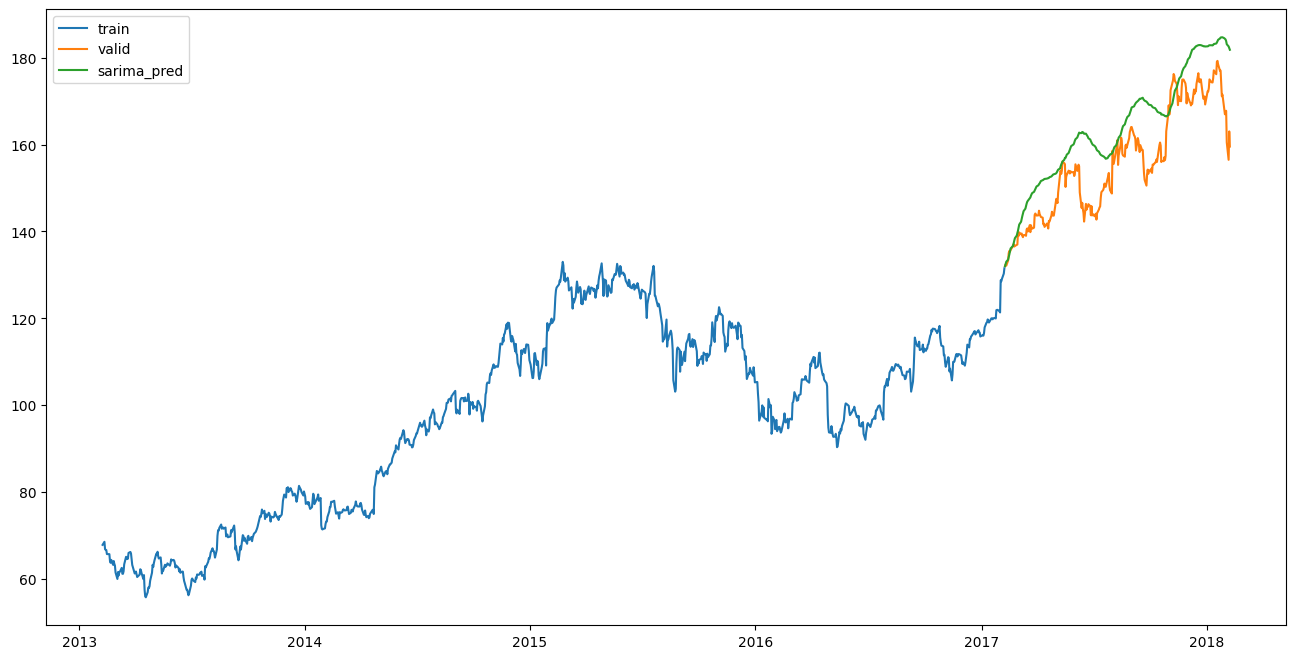

In [55]:
plt.figure(figsize=(16,8))
plt.plot(train.close,label='train')
plt.plot(valid.close,label='valid')
plt.plot(valid.sarima_pred,label='sarima_pred')
plt.legend(loc='best')
plt.show()

In [58]:
print('root mean_squared error',root_mean_squared_error(valid.close,valid.sarima_pred))
print('mean absulote error',mean_absolute_error(valid.close,valid.sarima_pred))

root mean_squared error 9.600206755397243
mean absulote error 8.138804609291778


# prophet model handles trends seasonality and holidays automatically

In [60]:
from prophet import Prophet

df_prophet=train.reset_index()[['date','close']].rename(columns={'date':'ds','close':'y'})
model=Prophet(daily_seasonality=False,yearly_seasonality=False)

model.fit(df_prophet)

future=model.make_future_dataframe(periods=len(valid))
forecast=model.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpna__66l0/l_aj01rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpna__66l0/62tvl7bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56751', 'data', 'file=/tmp/tmpna__66l0/l_aj01rw.json', 'init=/tmp/tmpna__66l0/62tvl7bc.json', 'output', 'file=/tmp/tmpna__66l0/prophet_model1admlivz/prophet_model-20250925050318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:03:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [63]:
# valid['prophet_pred'] = pd.Series(forecast.values, index=valid.index)

# Slice the forecast to match the length and index of the validation set
valid['prophet_pred'] = forecast['yhat'].iloc[-len(valid):].values

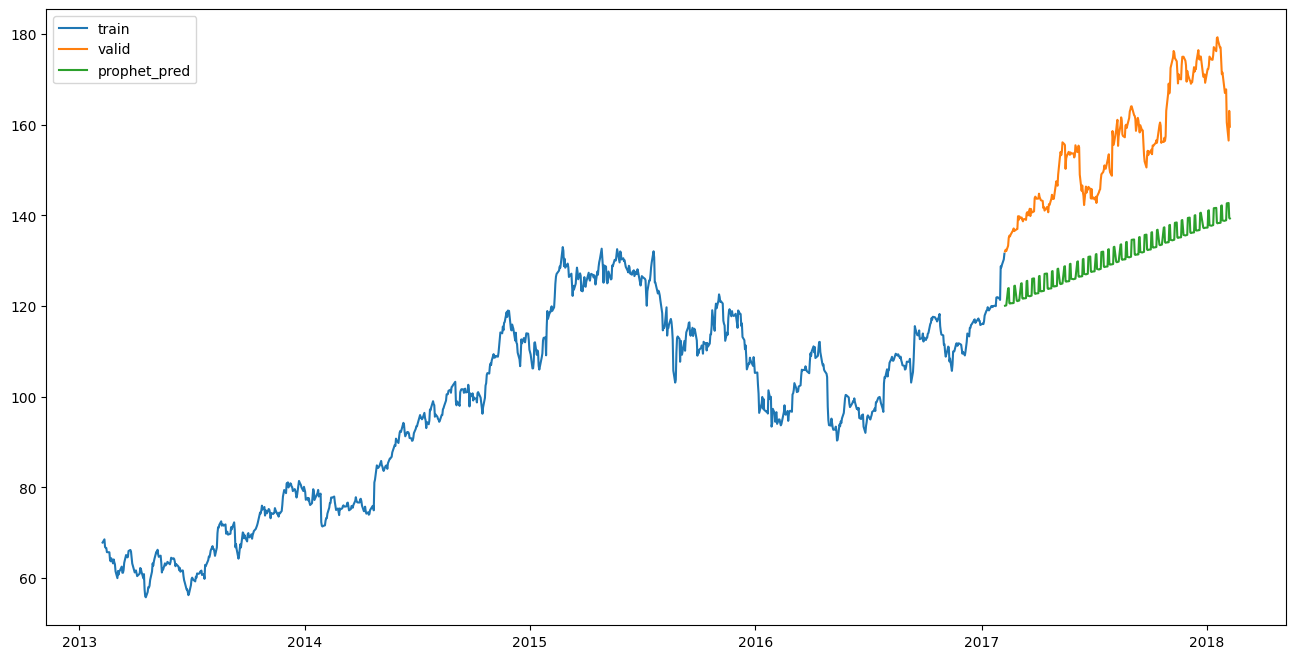

In [65]:
plt.figure(figsize=(16,8))
plt.plot(train.close,label='train')
plt.plot(valid.close,label='valid')
plt.plot(valid.prophet_pred,label='prophet_pred')
plt.legend(loc='best')
plt.show()

In [66]:
print('root mean square error',root_mean_squared_error(valid.close,valid.prophet_pred))

root mean square error 26.081935939247497


In [67]:
valid.head()


,open,high,low,close,volume,Name,year,month,day,day of week,MA_30,STD_30,ma_period,arima_pred,holt_period,sarima_pred,prophet_pred
date,,,,,,,,,,,,,,,,,
2017-02-08,131.35,132.220,131.22,132.04,23004072,AAPL,2017,2,8,2,121.273000,4.837457,121.273000,131.559923,131.593296,132.014291,120.071828
2017-02-09,131.65,132.445,131.12,132.42,28349859,AAPL,2017,2,9,3,121.778333,5.183260,121.778333,131.560645,131.656591,132.489333,120.108121
2017-02-10,132.46,132.940,132.05,132.12,20065458,AAPL,2017,2,10,4,122.290333,5.423516,122.290333,131.560662,131.719887,133.026082,120.149729
2017-02-13,133.08,133.820,132.75,133.29,23035421,AAPL,2017,2,13,0,122.842333,5.674977,122.842333,131.560662,131.783183,133.520601,123.880042
2017-02-14,133.47,135.090,133.25,135.02,33226223,AAPL,2017,2,14,1,123.482333,5.932523,123.482333,131.560662,131.846479,134.077199,123.956630


In [76]:

def evaluate_model(true, pred, model_name):
    rmse = root_mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f'{model_name}\n - RMSE: {rmse:.4f}, \n - MAE: {mae:.4f}')
    return rmse, mae

evaluate_model(valid['close'], valid['STD_30'], 'Naive Model')
evaluate_model(valid['close'], valid['MA_30'], 'ma Model')
evaluate_model(valid['close'], valid['ma_period'], 'Moving Average (30-day)')
evaluate_model(valid['close'], valid['arima_pred'], 'ARIMA(1,1,0)')
evaluate_model(valid['close'], valid['holt_period'], 'Holt-Winters (Additive)')
evaluate_model(valid['close'], valid['sarima_pred'], 'SARIMAX(5,1,1)')
evaluate_model(valid['close'], valid['prophet_pred'], 'Prophet')

Naive Model
 - RMSE: 152.1785, 
 - MAE: 151.6747
ma Model
 - RMSE: 6.1037, 
 - MAE: 5.0000
Moving Average (30-day)
 - RMSE: 6.1037, 
 - MAE: 5.0000
ARIMA(1,1,0)
 - RMSE: 27.0234, 
 - MAE: 24.0692
Holt-Winters (Additive)
 - RMSE: 18.1071, 
 - MAE: 16.0930
SARIMAX(5,1,1)
 - RMSE: 9.6002, 
 - MAE: 8.1388
Prophet
 - RMSE: 26.0819, 
 - MAE: 24.9076


(26.081935939247497, 24.907614827784506)

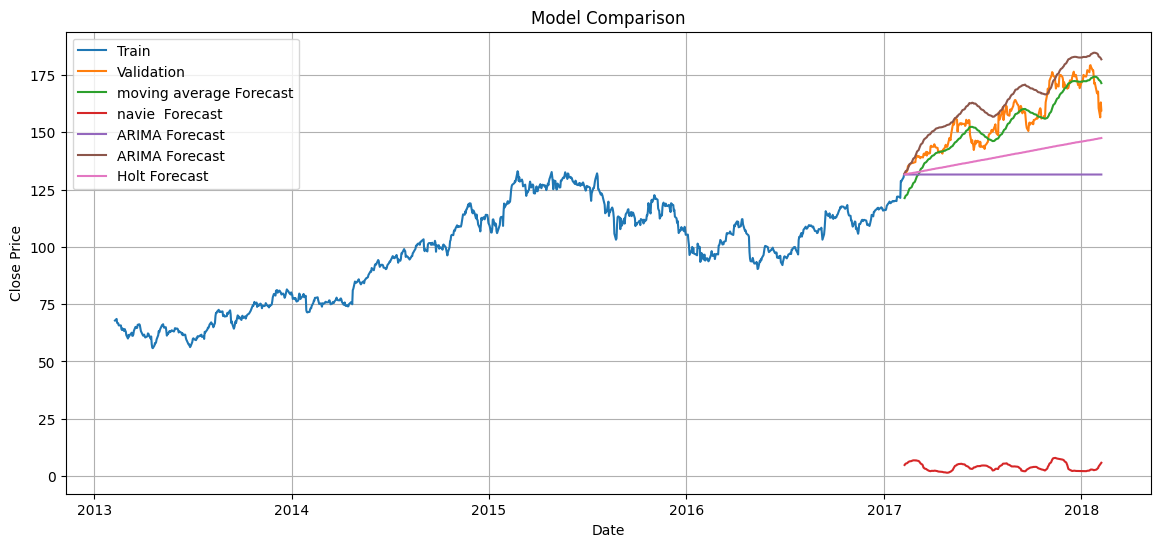

In [80]:
plt.figure(figsize=(14,6))
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Validation')
plt.plot(valid['MA_30'], label='moving average Forecast')
plt.plot(valid['STD_30'], label='navie  Forecast')
plt.plot(valid['arima_pred'], label='ARIMA Forecast')
plt.plot(valid['sarima_pred'], label='ARIMA Forecast')
plt.plot(valid['holt_period'], label='Holt Forecast')
plt.title('Model Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Calculate the minimum and maximum dates in the 'date' column
min_date = df.index.min()
max_date = df.index.max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2013-02-08 00:00:00
Maximum Date: 2018-02-07 00:00:00


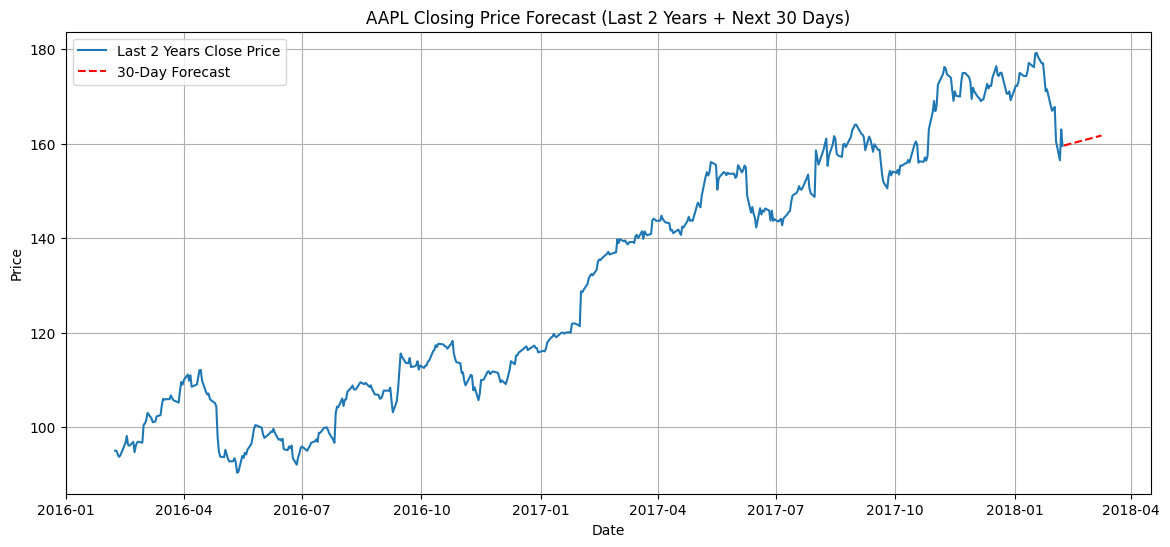

📈 Forecasted Closing Prices for Next 30 Days:
              Forecast
2018-02-08  159.612882
2018-02-09  159.685764
2018-02-10  159.758646
2018-02-11  159.831529
2018-02-12  159.904411
2018-02-13  159.977293
2018-02-14  160.050175
2018-02-15  160.123057
2018-02-16  160.195939
2018-02-17  160.268821
2018-02-18  160.341703
2018-02-19  160.414585
2018-02-20  160.487468
2018-02-21  160.560350
2018-02-22  160.633232
2018-02-23  160.706114
2018-02-24  160.778996
2018-02-25  160.851878
2018-02-26  160.924760
2018-02-27  160.997642
2018-02-28  161.070524
2018-03-01  161.143407
2018-03-02  161.216289
2018-03-03  161.289171
2018-03-04  161.362053
2018-03-05  161.434935
2018-03-06  161.507817
2018-03-07  161.580699
2018-03-08  161.653581
2018-03-09  161.726464


In [105]:
df = pd.read_csv('AAPL_data.csv')

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
ts = df['close']

model = ExponentialSmoothing(ts, trend='add', seasonal=None)
model_fit = model.fit()

#Forecast next 30 days
forecast_steps = 30
forecast_values = model_fit.forecast(forecast_steps)

last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'Forecast': forecast_values.values}, index=future_dates)

two_years_ago = last_date - pd.DateOffset(years=2)
ts_recent = ts[ts.index >= two_years_ago]

plt.figure(figsize=(14,6))
plt.plot(ts_recent, label='Last 2 Years Close Price')
plt.plot(forecast_df, label='30-Day Forecast', linestyle='--', color='red')
plt.title('AAPL Closing Price Forecast (Last 2 Years + Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Closing Prices for Next 30 Days:")
print(forecast_df)

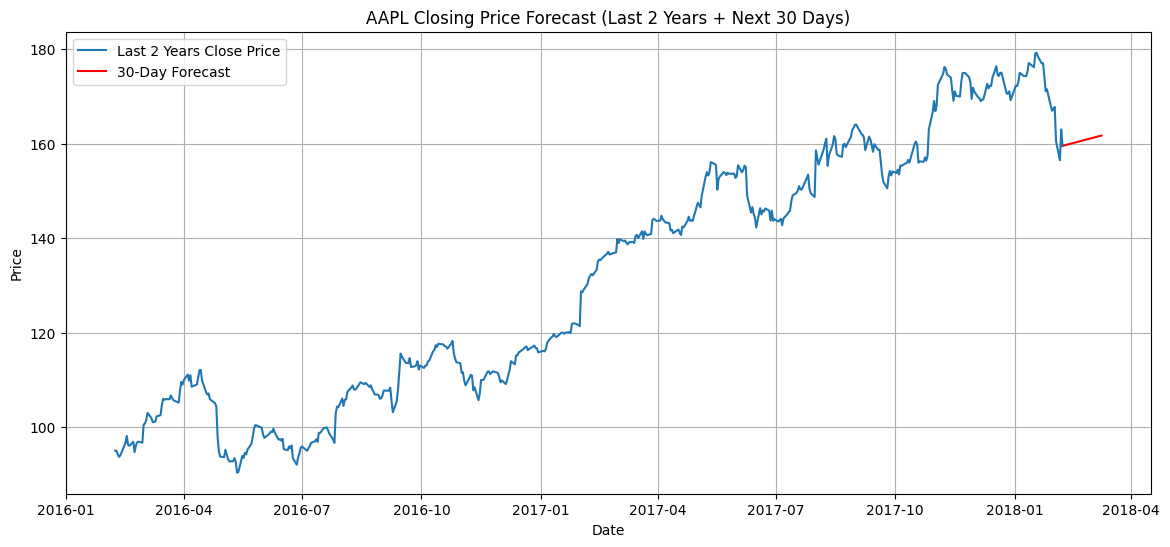

📈 Forecasted Closing Prices for Next 30 Days:
              Forecast
2018-02-08  159.612882
2018-02-09  159.685764
2018-02-10  159.758646
2018-02-11  159.831529
2018-02-12  159.904411
2018-02-13  159.977293
2018-02-14  160.050175
2018-02-15  160.123057
2018-02-16  160.195939
2018-02-17  160.268821
2018-02-18  160.341703
2018-02-19  160.414585
2018-02-20  160.487468
2018-02-21  160.560350
2018-02-22  160.633232
2018-02-23  160.706114
2018-02-24  160.778996
2018-02-25  160.851878
2018-02-26  160.924760
2018-02-27  160.997642
2018-02-28  161.070524
2018-03-01  161.143407
2018-03-02  161.216289
2018-03-03  161.289171
2018-03-04  161.362053
2018-03-05  161.434935
2018-03-06  161.507817
2018-03-07  161.580699
2018-03-08  161.653581
2018-03-09  161.726464


In [107]:
df = pd.read_csv('AAPL_data.csv')

# Ensure 'date' is datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
ts = df['close']

# Step 2: Fit Holt’s Linear Trend model
model = ExponentialSmoothing(ts, trend='add', seasonal=None)
model_fit = model.fit()

# Step 3: Forecast next 30 days
forecast_steps = 30
forecast_values = model_fit.forecast(forecast_steps)

# Step 4: Create future date index
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'Forecast': forecast_values.values}, index=future_dates)

# Step 5: Filter last 2 years of historical data
two_years_ago = last_date - pd.DateOffset(years=2)
ts_recent = ts[ts.index >= two_years_ago]

# Step 6: Plot last 2 years + forecast
plt.figure(figsize=(14,6))
plt.plot(ts_recent, label='Last 2 Years Close Price')
plt.plot(forecast_df, label='30-Day Forecast',  color='red')
plt.title('AAPL Closing Price Forecast (Last 2 Years + Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Display forecasted values
print("📈 Forecasted Closing Prices for Next 30 Days:")
print(forecast_df)